        Season  Mean NDVI  Median NDVI  Std Dev NDVI
0  Yearly Mean   0.304109     0.304109           NaN
1       Spring   0.311694     0.311694           NaN
2       Summer   0.367443     0.367443           NaN
3       Autumn   0.301592     0.301592           NaN
4       Winter   0.128800     0.128800           NaN


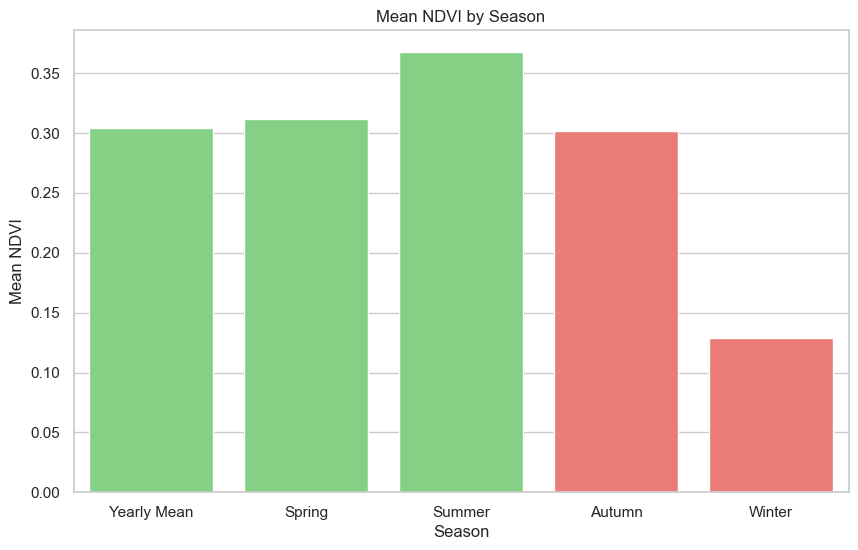

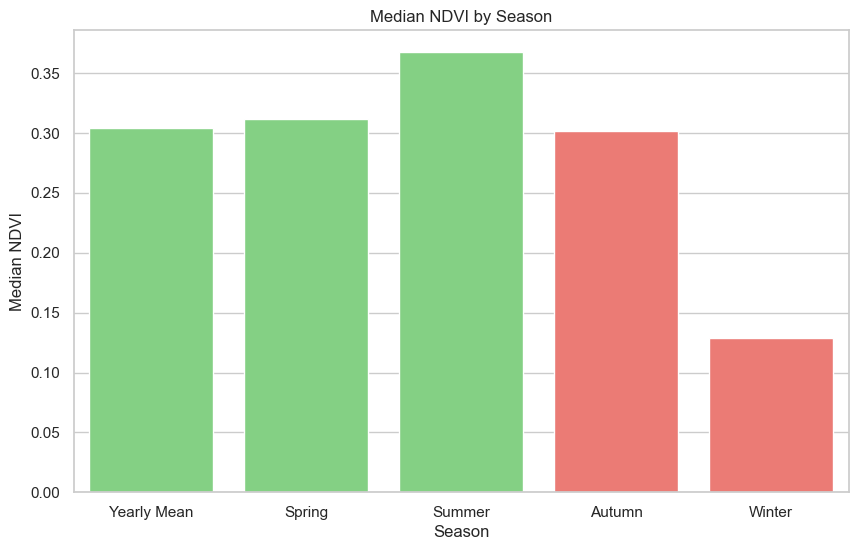

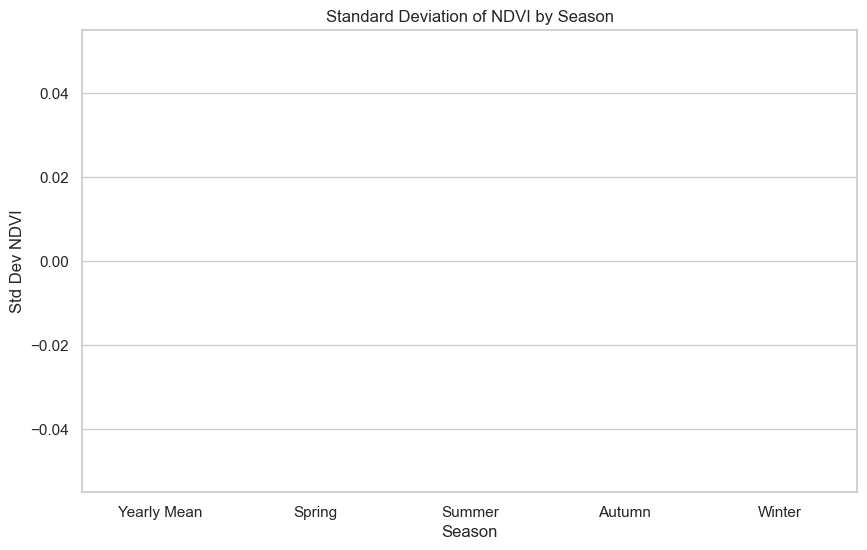

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the CSV files
mean_ndvi_df = pd.read_csv('C:/Git_Repos/Monitoring_Forest_Dashboard/data/mean_ndvi_2023.csv')
spring_ndvi_df = pd.read_csv('C:/Git_Repos/Monitoring_Forest_Dashboard/data/Median_NDVI_Spring_2023.csv')
summer_ndvi_df = pd.read_csv('C:/Git_Repos/Monitoring_Forest_Dashboard/data/Median_NDVI_Summer_2023.csv')
autumn_ndvi_df = pd.read_csv('C:/Git_Repos/Monitoring_Forest_Dashboard/data/Median_NDVI_Autumn_2023.csv')
winter_ndvi_df = pd.read_csv('C:/Git_Repos/Monitoring_Forest_Dashboard/data/Median_NDVI_Winter_2023.csv')

# Function to convert string representations of lists to numeric values
def convert_ndvi_column(df):
    df['NDVI'] = df['NDVI'].apply(lambda x: np.mean(ast.literal_eval(x)))
    return df

# Apply the conversion to all DataFrames
mean_ndvi_df = convert_ndvi_column(mean_ndvi_df)
spring_ndvi_df = convert_ndvi_column(spring_ndvi_df)
summer_ndvi_df = convert_ndvi_column(summer_ndvi_df)
autumn_ndvi_df = convert_ndvi_column(autumn_ndvi_df)
winter_ndvi_df = convert_ndvi_column(winter_ndvi_df)

# Calculate statistics
def calculate_statistics(df):
    mean = df['NDVI'].mean()
    median = df['NDVI'].median()
    std_dev = df['NDVI'].std()
    return mean, median, std_dev

mean_stats = calculate_statistics(mean_ndvi_df)
spring_stats = calculate_statistics(spring_ndvi_df)
summer_stats = calculate_statistics(summer_ndvi_df)
autumn_stats = calculate_statistics(autumn_ndvi_df)
winter_stats = calculate_statistics(winter_ndvi_df)

# Create a DataFrame to display statistics
stats_df = pd.DataFrame({
    'Season': ['Yearly Mean', 'Spring', 'Summer', 'Autumn', 'Winter'],
    'Mean NDVI': [mean_stats[0], spring_stats[0], summer_stats[0], autumn_stats[0], winter_stats[0]],
    'Median NDVI': [mean_stats[1], spring_stats[1], summer_stats[1], autumn_stats[1], winter_stats[1]],
    'Std Dev NDVI': [mean_stats[2], spring_stats[2], summer_stats[2], autumn_stats[2], winter_stats[2]]
})

print(stats_df)

# Plotting NDVI statistics
sns.set(style="whitegrid")

# Plot for Mean NDVI
plt.figure(figsize=(10, 6))
colors = ['#77dd77', '#77dd77', '#77dd77', '#ff6961', '#ff6961']
sns.barplot(x='Season', y='Mean NDVI', data=stats_df, palette=colors)
plt.title('Mean NDVI by Season')
plt.show()

# Plot for Median NDVI
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Median NDVI', data=stats_df, palette=colors)
plt.title('Median NDVI by Season')
plt.show()

# Plot for Standard Deviation of NDVI
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Std Dev NDVI', data=stats_df, palette=colors)
plt.title('Standard Deviation of NDVI by Season')
plt.show()
